In [1]:
!python --version

Python 3.7.12


**Julien VALENTIN**, **Mars 2022**

In [2]:
from matplotlib import pyplot
import numpy

# Problème de Poisson - Dirichlet en 1.D

Notons
$$
    u : \left\{ \begin{array}{rcl}
        [0,1] & \longrightarrow & \mathbb{R} \\
        x & \longmapsto & \sin(2\pi x)
        \end{array} \right.
$$

$u$ est analytique et vérifie l'équation de Poisson

> \begin{align}
-\Delta u(x) & = 4\pi^2 \sin(2\pi x) & \forall x (0,1) \\
u(0) & = 0 \\
u(1) & = 0 
\end{align}

In [3]:
# Setup
f = lambda x : 4*numpy.pi**2 * numpy.sin(2 * numpy.pi * x)    # second membre
u = lambda x : numpy.sin(2 * numpy.pi * x)                    # solution analytique

# Discrétisation
xg = 0                             # limite inférieure du segment [0,1]
xd = 1                             # limite supérieure du segment [0,1]
dx = .025                          # pas d'espace
nx = int( (xd-xg) / dx ) + 1       # nombre de points de la discrétisation
Ox = numpy.linspace(xg, xd, nx)    # discrétisation du segment [0,1]

# Stencil à trois points pour le Laplacien

Le problème revient à résoudre un système linéaire $$ A x = b $$

In [4]:
# Implémentation de l'opérateur laplacien
# C'est une matrice à trois bandes
A = - 2 * numpy.eye(nx-2) + numpy.diag(numpy.ones(nx-3),1) + numpy.diag(numpy.ones(nx-3), -1)
       # diagonale               # sur-diagonale                     # sous-diagonale
A = -A
A = A/dx**2

# Construction du second membre
b = f(Ox[1:-1])    # on évalue f à l'intérieur de l'intervalle

# Résolution du système linéaire
Uh = numpy.zeros(nx)
Uh[1:-1] = numpy.linalg.solve(A, b)    # résolution de l'équation à l'intérieur du segment
Uh[0]  = 0    # Dirichlet en 0
Uh[-1] = 0    # Dirichlet en 1

# Solution analytique
U = u(Ox)

# Champ d'erreurs
err = numpy.abs(Uh-U)

Traçons la solution approchée ainsi que le champ d'erreurs $L^2$.

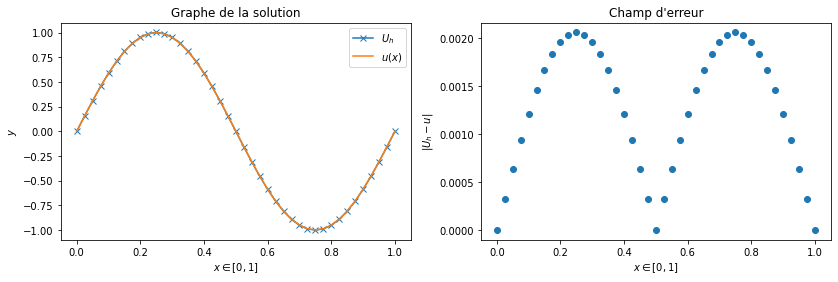

In [5]:
fig, ax, = pyplot.subplots(1, 2)
fig.set_figwidth(2.3 * fig.get_figwidth())

ax[0].plot(Ox, Uh, label="$U_h$", marker='x')
ax[0].plot(Ox, U, label="$u(x)$")
ax[0].legend()
ax[0].set_title("Graphe de la solution")
ax[0].set_xlabel("$x \in [0,1]$")
ax[0].set_ylabel("$y$")

ax[1].scatter(Ox, err)
ax[1].set_title("Champ d'erreur")
ax[1].set_xlabel("$x \in [0,1]$")
ax[1].set_ylabel("$|U_h-u|$")

pyplot.show()

# Stencil à cinq points pour le Laplacien

In [6]:
# Implémentation de l'opérateur laplacien
# C'est une matrice à cinq bandes
A = - 30 * numpy.eye(nx-2) - 16 * numpy.diag(numpy.ones(nx-3), 1) - 16 * numpy.diag(numpy.ones(nx-3),-1) + \
    numpy.diag(numpy.ones(nx-4), 2) + numpy.diag(numpy.ones(nx-4),-2)

A = A / (12*dx**2)

A[0, :] = 0
A[0, 0] = -2/dx**2
A[0, 1] = 1/dx**2

A[-1, :] = 0
A[-1,-1] = -2/dx**2
A[-1,-2] = 1/dx**2

# Construction du second membre
b = f(Ox[1:-1])    # on évalue f à l'intérieur de l'intervalle

# Résolution du système linéaire
Uh = numpy.zeros(nx)
Uh[1:-1] = numpy.linalg.solve(A, b)    # résolution de l'équation à l'intérieur du segment
Uh[0]  = 0    # Dirichlet en 0
Uh[-1] = 0    # Dirichlet en 1

# Solution analytique
U = u(Ox)

# Champ d'erreurs
err = numpy.abs(Uh-U)

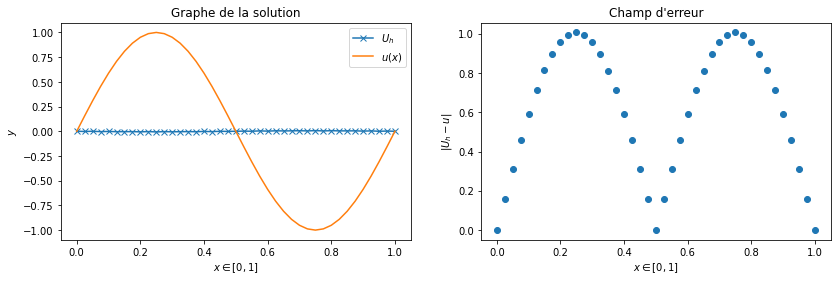

In [7]:
fig, ax, = pyplot.subplots(1, 2)
fig.set_figwidth(2.3 * fig.get_figwidth())

ax[0].plot(Ox, Uh, label="$U_h$", marker='x')
ax[0].plot(Ox, U, label="$u(x)$")
ax[0].legend()
ax[0].set_title("Graphe de la solution")
ax[0].set_xlabel("$x \in [0,1]$")
ax[0].set_ylabel("$y$")

ax[1].scatter(Ox, err)
ax[1].set_title("Champ d'erreur")
ax[1].set_xlabel("$x \in [0,1]$")
ax[1].set_ylabel("$|U_h-u|$")

pyplot.show()